(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)
(168, 300)


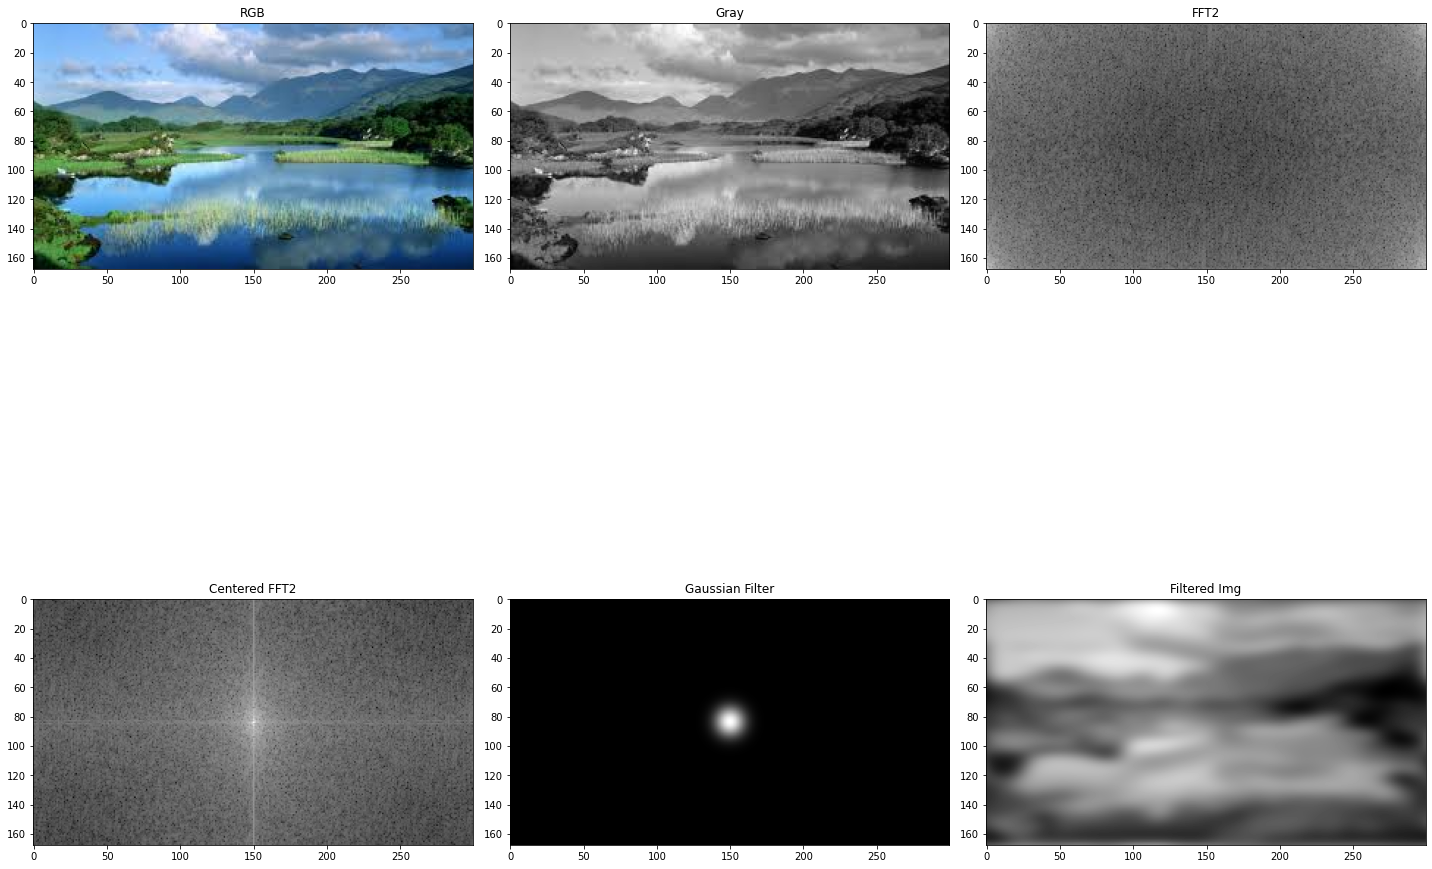

In [1]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# Build a Gaussian filter.
	ncols, nrows = gray.shape
	gaussian_filter = build_gaussian_filter(ncols, nrows)

	# Apply Gaussian filter
	ftimg_gf = centered_ftimg * gaussian_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, gaussian_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Gaussian Filter', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter
	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (20, 20))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


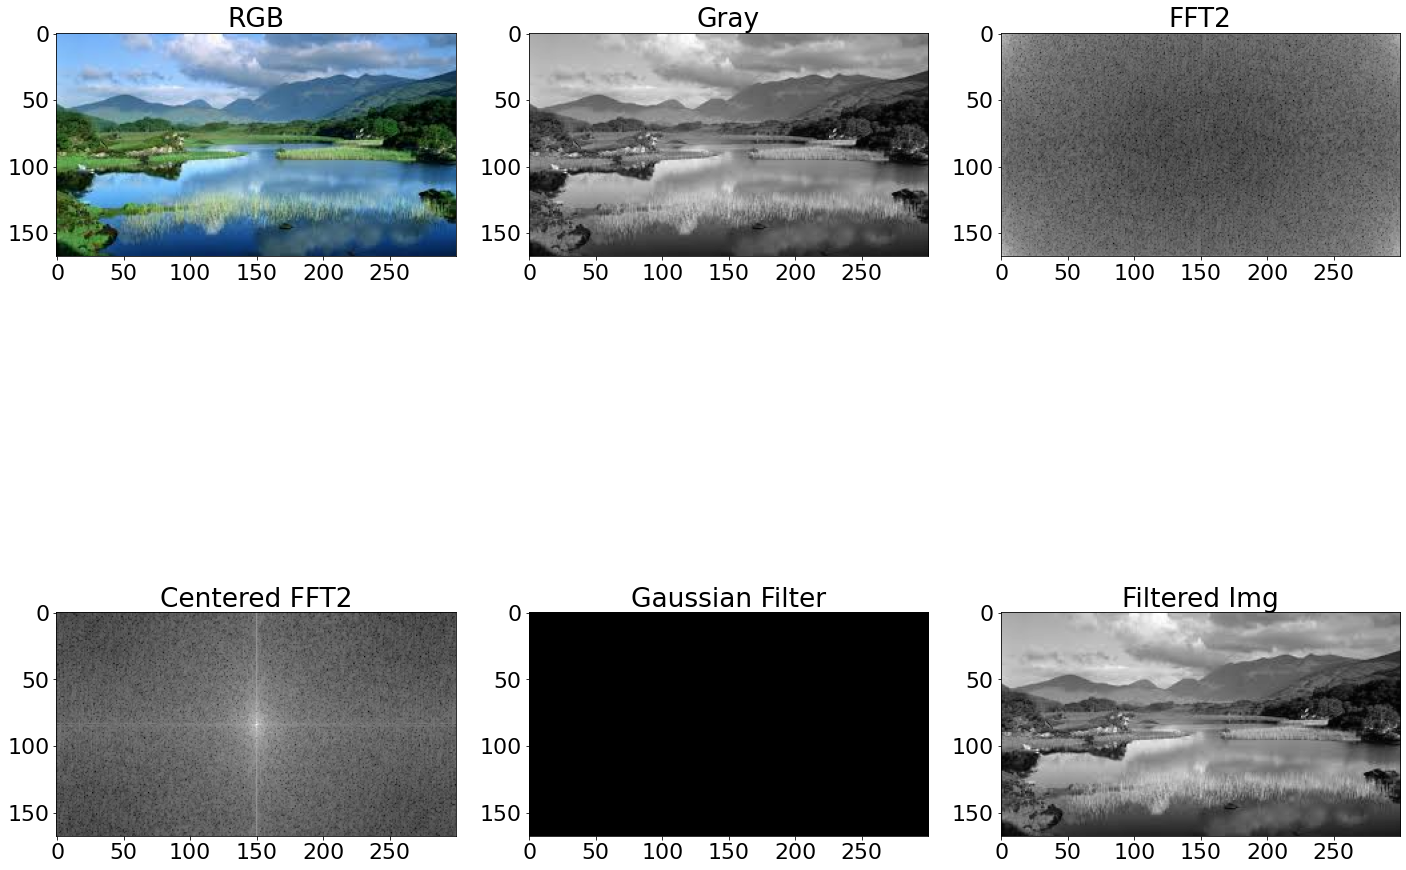

In [15]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# Build a Gaussian filter.
	ncols, nrows = gray.shape
	# gaussian_filter = build_gaussian_filter(ncols, nrows)
	
	# sobel_filter = build_sobel_filter(centered_ftimg)

	mean_filter = build_mean_filter(ncols, nrows)
	ftimg_mf = centered_ftimg * mean_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_mf))


	# ftimg_sf = centered_ftimg * sobel_filter
	# filtered_img = np.abs(np.fft.ifft2(sobel_filter))

	# Apply Gaussian filter
	# ftimg_gf = centered_ftimg * gaussian_filter
	# filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, mean_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Mean Filter', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	

	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_mean_filter(nrows, ncols):
	mean_filter = np.ones((nrows, ncols))
	mean_filter = mean_filter / (nrows * ncols)
	return mean_filter


def build_sobel_filter(img):
	Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
	Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

	rows = img.shape[0]
	cols = img.shape[1]
	mag = np.zeros((rows, cols))

	for i in range(rows-2):
		for j in range(cols-2):
			S1 = np.sum(np.sum(img[i:i+3, j:j+3] * Gx))
			S2 = np.sum(np.sum(img[i:i+3, j:j+3] * Gy))

			mag[i+1, j+1] = np.sqrt(S1**2 + S2**2)
	
	threshold = 70
	mag[mag < threshold] = 0
	# output_img = mag[mag > threshold]
	# output_img[output_img == threshold] = 0
	return mag


	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (20, 20))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

In [7]:
nrows = 3
ncols = 3
sigmax, sigmay = 10, 10
cx, cy = nrows/2, ncols/2
x = np.linspace(0, nrows, nrows)
y = np.linspace(0, ncols, ncols)


X, Y = np.meshgrid(x, y)
gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
print(gaussian_filter.shape)

(3, 3)


In [8]:
X

array([[0. , 1.5, 3. ],
       [0. , 1.5, 3. ],
       [0. , 1.5, 3. ]])

In [9]:
Y

array([[0. , 0. , 0. ],
       [1.5, 1.5, 1.5],
       [3. , 3. , 3. ]])

(168, 300) (168, 300) (168, 300)
254 0 (6078418+0j) (-503450.7804178406-502880.06651912787j) (6078418+0j) (-503450.7804178406-502880.06651912787j)


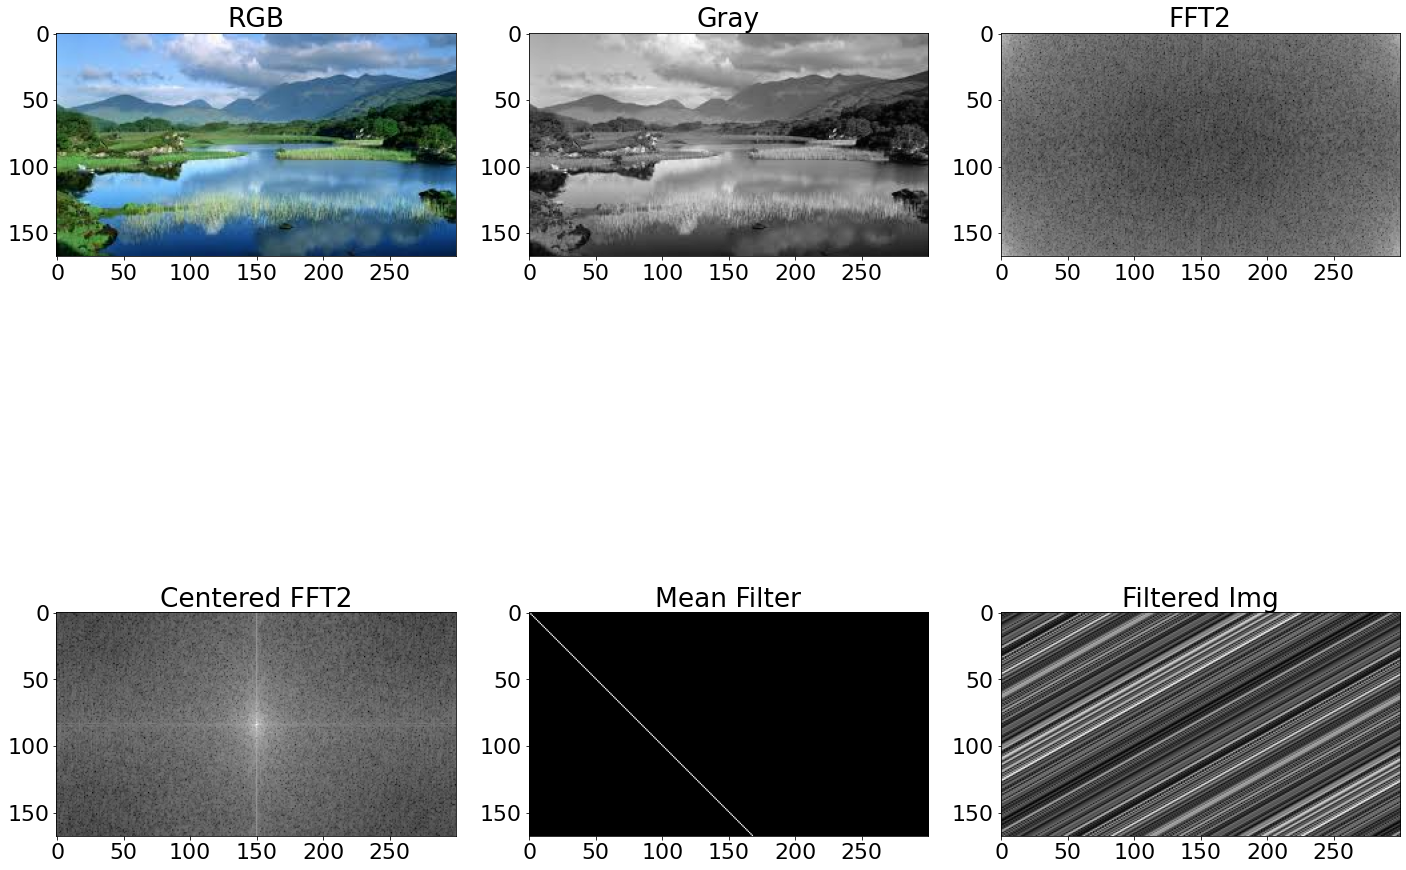

In [19]:
#	=====================================================================
#	Purpose: To understand the effect of Fourier Transform on an image.
#	---------------------------------------------------------------------
#	Sangeeta Biswas
#	Associate Professor
#	University of Rajshahi, Rajshahi
#	12.8.2022
#	=====================================================================
import matplotlib.pyplot as plt
import cv2
import numpy as np

def main():
	# Load image.
	img_path = '../village.jpeg'#GhostPepper.jpg' #PaddyField.jpeg'
	rgb = plt.imread(img_path)

	# Convert images
	gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)

	# Perform Fast Fourier Transformation for 2D signal, i.e., image
	ftimg = np.fft.fft2(gray)
	centered_ftimg = np.fft.fftshift(ftimg)
	magnitude_spectrum = 100 * np.log(np.abs(ftimg))
	centered_magnitude_spectrum = 100 * np.log(np.abs(centered_ftimg))

	print(gray.shape, ftimg.shape, centered_ftimg.shape)
	print(gray.max(), gray.min(), ftimg.max(), ftimg.min(), centered_ftimg.max(), centered_ftimg.min())

	# Build a Gaussian filter.
	ncols, nrows = gray.shape
	# gaussian_filter = build_gaussian_filter(ncols, nrows)
	
	# sobel_filter = build_sobel_filter(centered_ftimg)

	mean_filter = build_motion_filter(ncols, nrows)
	ftimg_mf = centered_ftimg * mean_filter
	filtered_img = np.abs(np.fft.ifft2(ftimg_mf))


	# ftimg_sf = centered_ftimg * sobel_filter
	# filtered_img = np.abs(np.fft.ifft2(sobel_filter))

	# Apply Gaussian filter
	# ftimg_gf = centered_ftimg * gaussian_filter
	# filtered_img = np.abs(np.fft.ifft2(ftimg_gf))

	# Save images all together by matplotlib.
	img_set = [rgb, gray, magnitude_spectrum, centered_magnitude_spectrum, mean_filter, filtered_img]
	title_set = ['RGB', 'Gray', 'FFT2', 'Centered FFT2', 'Mean Filter', 'Filtered Img']
	figpath = 'FFT2.png'
	matplotlib_plot_img(img_set, title_set, figpath)

def build_motion_filter(nrows, ncols):

    motion_filter = np.eye(nrows, ncols) / (nrows + ncols)
    return motion_filter



def build_gaussian_filter(ncols, nrows):
	sigmax, sigmay = 10, 10
	cx, cy = nrows/2, ncols/2
	x = np.linspace(0, nrows, nrows)
	y = np.linspace(0, ncols, ncols)
	

	X, Y = np.meshgrid(x, y)
	gaussian_filter = np.exp(-(((X-cx)/sigmax)**2 + ((Y-cy)/sigmay)**2))
	print(gaussian_filter.shape)

	return gaussian_filter

def build_mean_filter(nrows, ncols):
	mean_filter = np.ones((nrows, ncols))
	mean_filter = mean_filter / (nrows * ncols)
	return mean_filter


def build_sobel_filter(img):
	Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
	Gy = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

	rows = img.shape[0]
	cols = img.shape[1]
	mag = np.zeros((rows, cols))

	for i in range(rows-2):
		for j in range(cols-2):
			S1 = np.sum(np.sum(img[i:i+3, j:j+3] * Gx))
			S2 = np.sum(np.sum(img[i:i+3, j:j+3] * Gy))

			mag[i+1, j+1] = np.sqrt(S1**2 + S2**2)
	
	threshold = 70
	mag[mag < threshold] = 0
	# output_img = mag[mag > threshold]
	# output_img[output_img == threshold] = 0
	return mag


	
def matplotlib_plot_img(img_set, title_set, figpath):
	plt.rcParams.update({'font.size': 22})			
	plt.figure(figsize = (20, 20))
	n = len(img_set)
	for i in range(n):
		plt.subplot(2, 3, i + 1)
		plt.title(title_set[i])
		img = img_set[i]
		ch = len(img.shape)
		if (ch == 2):
			plt.imshow(img, cmap = 'gray')
		else:
			plt.imshow(img)			

	plt.tight_layout()
	plt.savefig(figpath)	
	plt.show()

if __name__ == '__main__':
	main()

In [ ]:

import numpy as np
import cv2
import matplotlib.pyplot as plt


def meanFilter(img,k):
  w,h,c = img.shape
  size = k // 2

  #0 padding process
  _img = np.zeros((w+2*size,h+2*size,c), dtype=np.uint8)
  _img[size:size+w,size:size+h] = img.copy().astype(np.uint8)
  dst = _img.copy()

  #Create filter
  ker = np.zeros((k,k), dtype=np.float)
  for x in range(-1*size,k-size):
    for y in range(-1*size,k-size):
      ker[x+size,y+size] = (1/k**2)

  #Filtering process
  for x in range(w):
    for y in range(h):
      for z in range(c):
        dst[x+size,y+size,z] = np.sum(ker*_img[x:x+k,y:y+k,z])

  dst = dst[size:size+w,size:size+h].astype(np.uint8)

  return dst


#Image reading
img = cv2.imread('image.jpg')

#Average filter
img = meanFilter(img,9)

#Save image
cv2.imwrite('result.jpg', img)
#Image display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def motionFilter(img,k):
  w,h,c = img.shape
  size = k // 2

  #0 padding process
  _img = np.zeros((w+2*size,h+2*size,c), dtype=np.uint8)
  _img[size:size+w,size:size+h] = img.copy().astype(np.uint8)
  dst = _img.copy()

  #Create filter
  ker = np.zeros((k,k), dtype=np.float)
  for i in range(-1*size,k-size):
    ker[i+size,i+size] = 1/k

  #Filtering process
  for x in range(w):
    for y in range(h):
      for z in range(c):
        dst[x+size,y+size,z] = np.sum(ker*_img[x:x+k,y:y+k,z])

  dst = dst[size:size+w,size:size+h].astype(np.uint8)

  return dst


#Image reading
img = cv2.imread('image.jpg')

#Motion filter
#Second argument: Filter size
img = motionFilter(img,21)

#Save image
cv2.imwrite('result.jpg', img)
#Image display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


def medianFilter(img,k):
  w,h,c = img.shape
  size = k // 2

  #0 padding process
  _img = np.zeros((w+2*size,h+2*size,c), dtype=np.float)
  _img[size:size+w,size:size+h] = img.copy().astype(np.float)
  dst = _img.copy()

  #Filtering process
  for x in range(w):
    for y in range(h):
      for z in range(c):
        dst[x+size,y+size,z] = np.median(_img[x:x+k,y:y+k,z])

  dst = dst[size:size+w,size:size+h].astype(np.uint8)

  return dst


#Image reading
img = cv2.imread('image.jpg')

#Median filter
#Second argument: Filter size
img = medianFilter(img,15)

#Save image
cv2.imwrite('result.jpg', img)
#Image display
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()